In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn.decomposition import PCA
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import MeanShift
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import MinMaxScaler


In [3]:
df = pd.read_csv('dataframe.csv')
df

,symmetry,longest_ortho_ratio,num_pixels_ratio,red_min,red_max,red_mean,red_median,red_std,green_min,green_max,green_mean,green_median,green_std,blue_min,blue_max,blue_mean,blue_median,blue_std,ecc,compactness
0,0.288274,0.837457,0.002516,5.0,208.0,68.749506,57.0,48.239988,3.0,199.0,55.627400,38.0,45.736010,0.0,193.0,40.433209,24.0,36.701656,0.388091,0.071731
1,0.327541,0.685837,0.002891,2.0,248.0,64.560638,56.0,42.435025,2.0,251.0,52.931944,34.0,43.254608,0.0,244.0,36.428700,19.0,34.992745,0.595575,0.072312
2,0.338071,0.806587,0.007395,3.0,255.0,107.320344,115.0,58.736815,0.0,255.0,87.982980,86.0,60.055950,0.0,255.0,63.508531,52.0,54.819316,0.236830,0.077042
3,0.384825,0.710961,0.004452,5.0,219.0,88.170607,89.0,46.403770,3.0,213.0,71.713538,62.0,46.297466,0.0,201.0,51.065063,37.0,37.797139,0.735058,0.067748
4,0.406315,0.749827,0.003075,6.0,255.0,123.546796,134.0,62.406482,0.0,250.0,101.315632,92.0,63.138573,0.0,245.0,81.362602,64.0,60.768198,0.650280,0.070427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,0.346617,0.984803,0.002083,7.0,214.0,98.700785,98.0,46.799467,7.0,208.0,75.144301,70.0,43.466326,0.0,204.0,55.657727,47.0,38.473859,0.776278,0.255672
245,0.371266,0.714982,0.006683,7.0,255.0,89.277366,82.0,52.397726,2.0,255.0,65.287788,52.0,46.710060,0.0,255.0,56.712233,46.0,39.267959,0.752551,0.212459
246,0.618560,0.773536,0.002344,5.0,252.0,79.894225,60.0,54.355815,4.0,239.0,60.236453,37.0,52.164212,0.0,233.0,57.192094,31.0,51.857752,0.648535,0.172757
247,0.499115,0.944126,0.003986,6.0,255.0,140.451749,141.0,57.828557,3.0,255.0,111.768241,119.0,52.958137,3.0,255.0,103.180300,102.0,53.474601,0.389568,0.313861


In [4]:
df_type = pd.read_csv('classif.csv', header=0)
df_type

,bug type,species
0,Bee,Apis mellifera
1,Bee,Apis mellifera
2,Bee,Apis mellifera
3,Bee,Apis mellifera
4,Bee,Apis mellifera
...,...,...
245,Bee,Apis mellifera
246,Bee,Apis mellifera
247,Bee,Apis mellifera
248,Bee,Apis mellifera


In [5]:
df['bug type'] = df_type['bug type']
df

,symmetry,longest_ortho_ratio,num_pixels_ratio,red_min,red_max,red_mean,red_median,red_std,green_min,green_max,...,green_median,green_std,blue_min,blue_max,blue_mean,blue_median,blue_std,ecc,compactness,bug type
0,0.288274,0.837457,0.002516,5.0,208.0,68.749506,57.0,48.239988,3.0,199.0,...,38.0,45.736010,0.0,193.0,40.433209,24.0,36.701656,0.388091,0.071731,Bee
1,0.327541,0.685837,0.002891,2.0,248.0,64.560638,56.0,42.435025,2.0,251.0,...,34.0,43.254608,0.0,244.0,36.428700,19.0,34.992745,0.595575,0.072312,Bee
2,0.338071,0.806587,0.007395,3.0,255.0,107.320344,115.0,58.736815,0.0,255.0,...,86.0,60.055950,0.0,255.0,63.508531,52.0,54.819316,0.236830,0.077042,Bee
3,0.384825,0.710961,0.004452,5.0,219.0,88.170607,89.0,46.403770,3.0,213.0,...,62.0,46.297466,0.0,201.0,51.065063,37.0,37.797139,0.735058,0.067748,Bee
4,0.406315,0.749827,0.003075,6.0,255.0,123.546796,134.0,62.406482,0.0,250.0,...,92.0,63.138573,0.0,245.0,81.362602,64.0,60.768198,0.650280,0.070427,Bee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,0.346617,0.984803,0.002083,7.0,214.0,98.700785,98.0,46.799467,7.0,208.0,...,70.0,43.466326,0.0,204.0,55.657727,47.0,38.473859,0.776278,0.255672,Bee
245,0.371266,0.714982,0.006683,7.0,255.0,89.277366,82.0,52.397726,2.0,255.0,...,52.0,46.710060,0.0,255.0,56.712233,46.0,39.267959,0.752551,0.212459,Bee
246,0.618560,0.773536,0.002344,5.0,252.0,79.894225,60.0,54.355815,4.0,239.0,...,37.0,52.164212,0.0,233.0,57.192094,31.0,51.857752,0.648535,0.172757,Bee
247,0.499115,0.944126,0.003986,6.0,255.0,140.451749,141.0,57.828557,3.0,255.0,...,119.0,52.958137,3.0,255.0,103.180300,102.0,53.474601,0.389568,0.313861,Bee


# **Split Data/Scale Data**

In [6]:
# Split the data into features and target variable
X = df.drop('bug type', axis=1)
df_6_features = X[['symmetry', 'longest_ortho_ratio', 'num_pixels_ratio', 'ecc', 'compactness']]
y = df['bug type']

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test , df_6_train, df_6_test= train_test_split(X, y, df_6_features, test_size=0.2, random_state=42)

# First split the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then split the train data into 75% train and 25% validation
# This will result in 60% train, 20% validation, and 20% test overall
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [47]:
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
X_val_np = X_val.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()
y_val_np = y_val.to_numpy()

# df_6_train_np = df_6_train.to_numpy()
# df_6_test_np = df_6_test.to_numpy()

scaler = StandardScaler()
X_stand_train = scaler.fit_transform(X_train_np)
X_stand_test = scaler.fit_transform(X_test_np)
X_stand_val = scaler.fit_transform(X_val_np)

# df_6_stand_train = scaler.fit_transform(df_6_train_np)
# df_6_stand_test = scaler.fit_transform(df_6_test_np)

scaler = MinMaxScaler()
X_norm_train = scaler.fit_transform(X_train_np)
X_norm_test = scaler.fit_transform(X_test_np)
X_norm_val = scaler.fit_transform(X_val_np)

encoder = LabelEncoder()
y_train_np = encoder.fit_transform(y_train_np)
y_test_np = encoder.fit_transform(y_test_np)
y_val_np = encoder.fit_transform(y_val_np)

# **2 supervised methods that are neither deep learning nor ensemble learning**

#### **Decision Tree**

In [98]:
model = 0
tampon = 0
for i in range (0, 1000):
    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier(max_depth=17, min_samples_split=19, min_samples_leaf=3, max_features='sqrt', criterion='entropy')

    # Train Decision Tree Classifer
    clf = clf.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)

    # Model Accuracy, how often is the classifier correct?
    accuracy = accuracy_score(y_test, y_pred) 
    if accuracy > tampon:
        print("Accuracy:", accuracy)
        tampon = accuracy
        model = clf

Accuracy: 0.46
Accuracy: 0.54
Accuracy: 0.58
Accuracy: 0.66
Accuracy: 0.68
Accuracy: 0.7
Accuracy: 0.72
Accuracy: 0.76


0.8 accuracy wow thats good but maybe overfit ?

#### **Gaussian Naive Bayes**

In [8]:
model = 0
tampon = 0
for i in range (1, 25):
    # Create a Gaussian Naive Bayes classifier
    gnb = GaussianNB(var_smoothing=1/i)

    # Fit the classifier to the training data
    gnb.fit(X_train, y_train)

    # Predict the labels of the test data
    y_pred = gnb.predict(X_test)

    # Model Accuracy, how often is the classifier correct?
    accuracy = accuracy_score(y_test, y_pred) 
    if accuracy > tampon:
        print("Accuracy:", accuracy)
        tampon = accuracy
        model = gnb

Accuracy: 0.34
Accuracy: 0.38
Accuracy: 0.4


0.48 is not a good result thats sad :,(

#### **K-Nearest Neighbors : KNN**

In [9]:
model = 0
tampon = 0
for i in range (1, 100):
    # Create the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=1, weights='distance', metric='manhattan')

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)

    # Predict the labels for the test data
    y_pred = knn.predict(X_test)

    # Evaluate the accuracy of the classifier
    accuracy = knn.score(X_test, y_test)
    if accuracy > tampon:
        print("Accuracy:", accuracy)
        tampon = accuracy
        model = knn

Accuracy: 0.46


0.5 is not good because there is a lot of bee and bumblebee so it just have to put only bee or bumblebee to have this result

#### **Learning Vector Quantization : LVQ**

Its a neural network so not in this part

# **1 supervised ensemble learning method**

#### **Random Forest Classifier**

In [10]:
model = 0
tampon = 0
for i in range (1, 25):
    # Create a Random Forest classifier
    rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=5, max_features='sqrt')

    # Fit the classifier to the training data
    rf.fit(X_train, y_train)

    # Predict the labels of the test data
    y_pred = rf.predict(X_test)

    # Compute the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > tampon:
        print("Accuracy:", accuracy)
        tampon = accuracy
        model = rf

Accuracy: 0.64
Accuracy: 0.66


0.7 is not that good of a result considering that we got 0.8 with just one tree before.

# **2 clustering methods**

#### **K-MEANS**

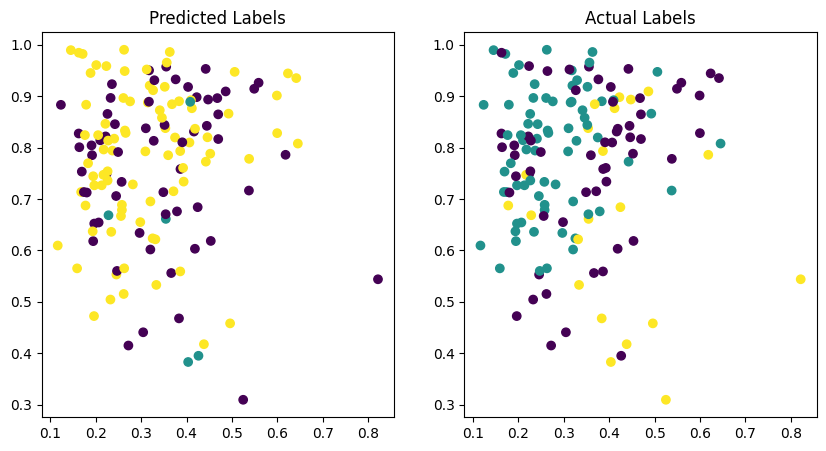

In [14]:
# Determine the number of unique labels
num_clusters = len(np.unique(y_train))
# Create a KMeans instance with num_clusters clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
# Fit model to the training data and predict the labels of the test data
kmeans.fit(X_train_np)

labels = kmeans.labels_
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train_np[:, 0], X_train_np[:, 1], c=labels)
plt.title('Predicted Labels')
plt.subplot(1, 2, 2)
plt.scatter(X_train_np[:, 0], X_train_np[:, 1], c=y_train_np)
plt.title('Actual Labels')
plt.show()


In [15]:
y_pred_train = kmeans.predict(X_train)
# Map the cluster labels to the actual labels
labels = np.zeros_like(y_pred_train)
for i in range(num_clusters):
    mask = (y_pred_train == i)
    labels[mask] = mode(y_train_np[mask])[0]

# Compute the accuracy
accuracy = accuracy_score(y_train, labels)
print('Accuracy:', accuracy)

Accuracy: 0.0


C:\Users\Romain Chevrollier\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [16]:
ari = adjusted_rand_score(y_train_np, y_pred_train)
print('Adjusted Rand index:', ari)

Adjusted Rand index: 0.03357311996958593


C:\Users\Romain Chevrollier\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


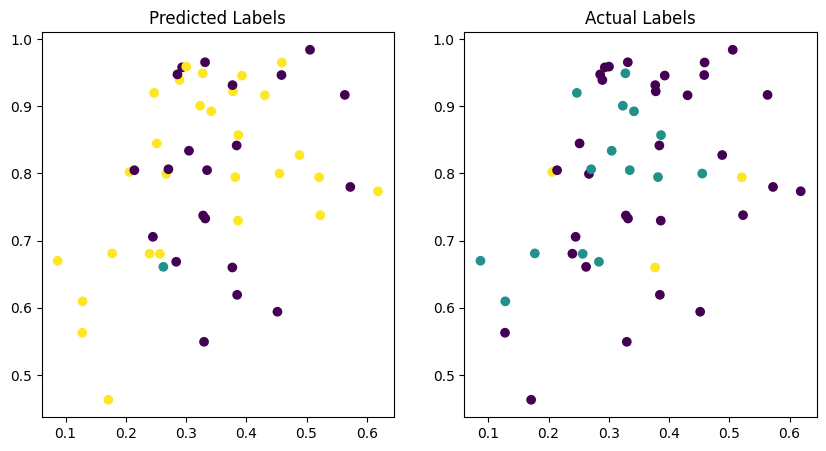

Adjusted Rand index: -0.009539989545216936


In [17]:
y_pred = kmeans.predict(X_test)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_test_np[:, 0], X_test_np[:, 1], c=y_pred)
plt.title('Predicted Labels')
plt.subplot(1, 2, 2)
plt.scatter(X_test_np[:, 0], X_test_np[:, 1], c=y_test_np)
plt.title('Actual Labels')
plt.show()

ari = adjusted_rand_score(y_test_np, y_pred)
print('Adjusted Rand index:', ari)

#### **MEANSHIFT**

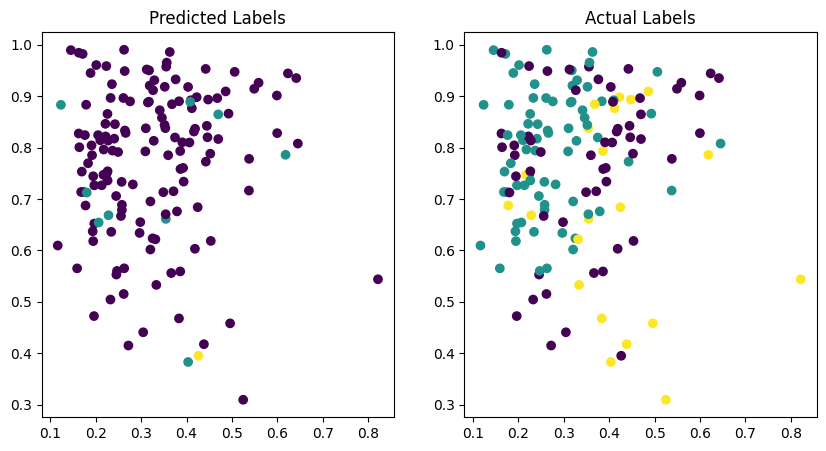

Adjusted Rand index: 0.038428703261110794


In [18]:
# Create the MeanShift object
ms = MeanShift()

# Fit the model to the training data
ms.fit(X_train_np)

# Get the cluster labels for each data point
labels = ms.labels_

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train_np[:, 0], X_train_np[:, 1], c=labels)
plt.title('Predicted Labels')
plt.subplot(1, 2, 2)
plt.scatter(X_train_np[:, 0], X_train_np[:, 1], c=y_train_np)
plt.title('Actual Labels')
plt.show()

ari = adjusted_rand_score(y_train_np, labels)
print('Adjusted Rand index:', ari)

#### **KERNEL DENSITY**

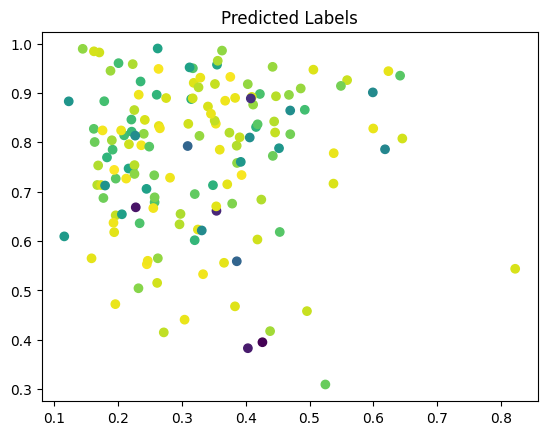

In [19]:
# Create an instance of KernelDensity with a specific kernel and bandwidth
kde = KernelDensity(kernel='gaussian', bandwidth=100)

# Fit the kernel density estimator to the data
kde.fit(X_train_np)
X1_density = np.exp(kde.score_samples(X_train_np))
plt.scatter(X_train_np[:, 0], X_train_np[:, 1], c=X1_density)
plt.title('Predicted Labels')
plt.show()

Not enough samples so results are trash

# **1 supervised neural network using your own features**

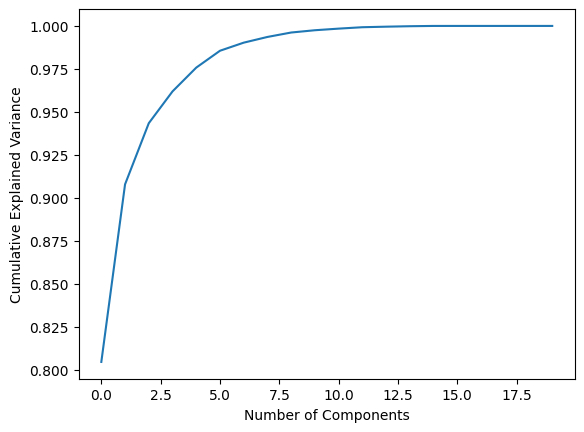

In [20]:
pca = PCA().fit(X_train_np)

# Plot the explained variance ratio
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [21]:
pca = PCA(n_components=5)
X_train_np_pca = pca.fit_transform(X_stand_train)
X_test_np_pca = pca.transform(X_stand_test)

In [22]:


num_units = len(np.unique(y_train))

In [116]:
def create_model(num_unit = num_units, neurons_1=1,neurons_2=1, dropout_rate_1=0.0, dropout_rate_2=0.0):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(neurons_1, input_dim=20, activation='relu'))
    model.add(tf.keras.layers.Dropout(dropout_rate_1))
    model.add(tf.keras.layers.Dense(neurons_2, activation='relu'))
    model.add(tf.keras.layers.Dropout(dropout_rate_2))
    model.add(tf.keras.layers.Dense(num_unit, activation='linear'))
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, epochs=1000, batch_size=10, verbose=0, dropout_rate_1=0.0, dropout_rate_2=0.0, neurons_1=1, neurons_2=1)

neurons_1 = list(range(1, 32))
neurons_2 = list(range(1, 32))
dropout_rate_1 = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
dropout_rate_2 = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
l2_reg = [0.0, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
param_grid = dict(neurons_1=neurons_1, neurons_2=neurons_2, dropout_rate_1=dropout_rate_1, dropout_rate_2=dropout_rate_2)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [121]:
random = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, cv=5, n_iter=50, verbose=2)
random_result = random.fit(X_stand_train, y_train_np, validation_data=(X_stand_val, y_val_np), callbacks=[early_stopping])

Fitting 5 folds for each of 50 candidates, totalling 250 fits


KeyboardInterrupt: 

In [118]:
best_model = random_result.best_estimator_
predictions = best_model.predict(X_stand_train)
comparison_train = (predictions == y_train_np)
accuracy_train = np.mean(comparison_train)
print("Accuracy on train data:", accuracy_train)

Accuracy on train data: 0.9530201342281879


In [119]:
predictions = best_model.predict(X_stand_test)
comparison_train = (predictions == y_test_np)
accuracy_train = np.mean(comparison_train)
print("Accuracy on train data:", accuracy_train)

Accuracy on train data: 0.54


In [120]:
best_params = random_result.best_params_
print(best_params)

{'neurons_2': 6, 'neurons_1': 27, 'dropout_rate_2': 0.7, 'dropout_rate_1': 0.0}


In [31]:
# # Define the model architecture
# # leaky_ReLU = tf.keras.layers.LeakyReLU(alpha=0.1)
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(17, activation='relu', input_shape=(20,)),  # Fix: Pass input_shape as a tuple
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(17, activation='relu',),
#     tf.keras.layers.Dense(num_units, activation='linear', kernel_regularizer=tf.keras.regularizers.l2(0.01))
# ])

# # Compile the model
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
# model.compile(optimizer=optimizer,
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# # Define early stopping
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=250)
# # callbacks=[early_stopping]

# # Train the model
# model.fit(X_stand_train, y_train_np, epochs=5000, batch_size=50)

In [32]:
# predictions = model.predict(X_stand_train)
# predictions_train = np.argmax(predictions, axis=1)
# comparison_train = (predictions_train == y_train_np)
# accuracy_train = np.mean(comparison_train)
# print("Accuracy on train data:", accuracy_train)

In [33]:
# predictions = model.predict(X_stand_test)
# predictions_train = np.argmax(predictions, axis=1)
# comparison_train = (predictions_train == y_test_np)
# accuracy_train = np.mean(comparison_train)
# print("Accuracy on train data:", accuracy_train)

#### **Auto-Encoder**

In [71]:
encoder = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=(20,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu')
])

# Define the decoder
decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation='relu', input_shape=(5,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(20, activation='sigmoid')
])

# Combine the encoder and the decoder to create the autoencoder
autoencoder = tf.keras.Sequential([
    encoder,
    decoder
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
autoencoder.compile(optimizer=optimizer, loss='binary_crossentropy')

# Assuming that `data` is your 249x20 dataset
autoencoder.fit(X_norm_train, X_norm_train,
                epochs=100,
                batch_size=10,
                shuffle=True,
                validation_data=(X_norm_val, X_norm_val))

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6940 - val_loss: 0.6900
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6883 - val_loss: 0.6858
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6835 - val_loss: 0.6795
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6745 - val_loss: 0.6657
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6543 - val_loss: 0.6418
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6226 - val_loss: 0.6165
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5890 - val_loss: 0.5985
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5587 - val_loss: 0.5820
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5400 - val_loss: 0.5679
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5271 - val_loss: 0.5594
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5160 - val_loss: 0.5530
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5

In [72]:
# Use the autoencoder to reconstruct the validation data
reconstructed_data = autoencoder.predict(X_norm_val)

# Calculate the reconstruction error
reconstruction_error = np.mean(np.abs(X_norm_val - reconstructed_data), axis=1)

# Print the mean reconstruction error
print(np.mean(reconstruction_error))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
0.11439162651684906


In [73]:
encoded_train = encoder.predict(X_norm_train)
encoded_val = encoder.predict(X_norm_val)
encoded_test = encoder.predict(X_norm_test)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 50),
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 10),
}
dtc = DecisionTreeClassifier()
random_search = RandomizedSearchCV(dtc, param_distributions=param_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(encoded_train, y_train_np)
print(random_search.best_params_)

In [108]:
model = 0
tampon_test = 0
tampon_train = 0
test_acc = []
train_acc = []
for i in range (0, 1000):
    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier(max_depth=45, min_samples_split=18, min_samples_leaf=8, max_features='sqrt', criterion='gini')

    # Train Decision Tree Classifer
    clf = clf.fit(encoded_train, y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(encoded_test)

    # Model Accuracy, how often is the classifier correct?
    accuracy = accuracy_score(y_test, y_pred) 
    if accuracy > tampon_test:
        test_acc.append(accuracy)
        tampon_test = accuracy
        model = clf

    y_pred = clf.predict(encoded_train)
    accuracy = accuracy_score(y_train, y_pred) 
    if accuracy > tampon_train:
        train_acc.append(accuracy)
        tampon_train = accuracy
        model = clf
print("Test Accuracy:", max(test_acc))
print("Train Accuracy:", max(train_acc))

Test Accuracy: 0.78
Train Accuracy: 0.7046979865771812
